<a href="https://colab.research.google.com/github/brashi/apresentacoes/blob/main/textoAprRecursao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Recursão - Conceitos e aplicações

A recursão é um valioso recurso na computação, com uma quantidade inimaginável de aplicações e com uma bagagem conceitual bem forte na ciência da computação.

Porém, nada de coisa assustadora aqui ! 

Vamos entender o processo por trás das recursões e em como ele se manifesta em certas aplicações.



---



#Conceito - Funções e recursão

O processo recursivo começa com o que chamamos de **Chamada Recursiva**, onde uma função chama a si mesmo, rodando o mesmo código e seguindo alguns parâmetros. Dividindo o problema em partes menores, este conceito é chamado de **Dividir e conquistar**.

Em geral, um algoritmo recursivo seguirá os seguintes parâmetros:

* Uma entrada, que será processada recursivamente
* O caso base ou condição de parada
* A chamada recursiva

Assim, para qualquer processo recursivo vamos ter o nosso **dado** (Entrada), que é processado a cada **chamada** da função até que uma certa **condição** seja atingida.



---



Para um melhor entendimento, vamos ver um exemplo?

##Fatorial - Cálculo de fatorial usando recursão

O cálculo de um fatorial é um exemplo onde temos uma natureza recursiva ! Lembrando a sua definição:




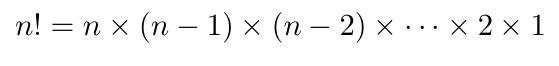

Observe que para qualquer número **n** que queiramos saber, vamos depender de seu antecessor **n - 1** de imediato, que por sua vez vai passar pelo mesmo processo até chegarmos a um número específico conhecido, que neste caso é 1. Temos um processo recursivo !

Vamos ver em código ?



In [ ]:
def fatorial(n):
  if (n == 1):
    return 1;
  else:
    return n * fatorial(n - 1)


#Quero fatorial de 6.
print("4! = ", fatorial(4))
print("5! = ", fatorial(5))
print("6! = ", fatorial(6))

### Código em C



```
#include <stdio.h>

int fatorial(int n) {
	if(n == 1) {
		return 1;
	} else {
		return fatorial(n - 1) * n;
	}
}

int main(int argc, char* argv[]) {

	printf("4! = %d\n", fatorial(4));
	printf("5! = %d\n", fatorial(5));
	printf("6! = %d\n", fatorial(6));

	return 0;
}
```





---



# Campo minado e recursão !

A questão a ser vista a luz da recursão é o famoso **Campo minado** (aquele mesmo que você jogava no Windows XP). O algoritmo por trás do jogo, que pode ser visto [Aqui](https://minesweeper.online/pt/) é uma ótima oportunidade de apresentarmos o processo de recursão, e agora vamos destrinchar os conceitos  dentro dele e ainda apresentando a aplicação direta do processo recursivo :)



---



## Conceitualização



Inicialmente, vamos dar uma olhada no que acontece quando interagimos com uma célula no campo minado.

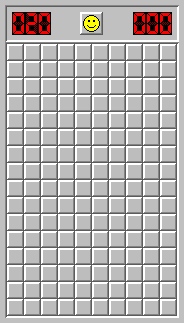

Ao clicar na célula, 3 coisas que podem acontecer:
  * Explodiu ! Clicou numa bomba :(
  * A célula vai indicar a quantidade de bombas na sua vizinhaça
  * **Ela vai abrir células ao seu redor**


O processo de *'Abrir'* células ao redor é **recursivo**, veja como o mesmo ocorre para cada célula vazia envolta da primeira célula, repetindo o processo até chegar em uma bomba, onde a célula irá indicar o número de bombas ao seu redor.



---



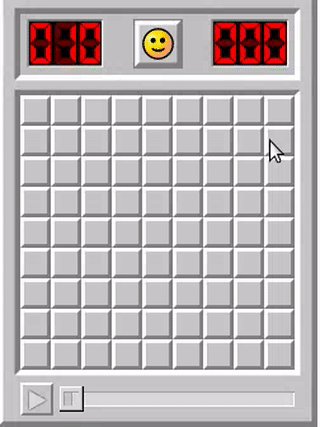

Veja como podemos descrever o algoritmo de quando clicamos em uma célula da seguinte maneira:

  * Se a célula for uma bomba, **Gamer Over**.
  * Se não for uma bomba, verifique as células ao redor por bombas e tenha o seu valor igual ao número de bombas.
  * Se encontrou bombas na vizinhaça, repita o processo para cada célula ao seu redor.


Agora, note como o processo de encontrar bombas é uma recursão. Onde a chamada recursiva ocorre quando **repetimos** a mesma função para as outras células (sem achar bombas envolta), e a condição de parada é quando a célula **encontra bombas** em sua vizinhaça ou quando atinge uma parede.



---



Vendo de perto, o que acontece após o clique, ilustrado pelo **ponto em preto**:

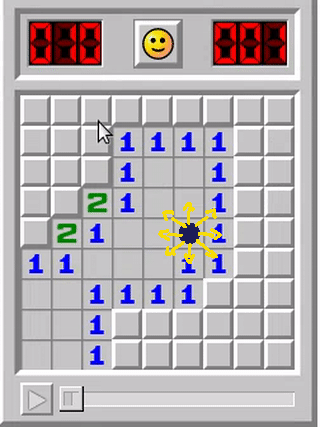

Como a célula clicada não possui bomba e também não tem vizinhos com bomba, ele vai realizar a chamada da função **recursivamente** para as suas células vizinhas, **indicado pelas setas em amarelo**.

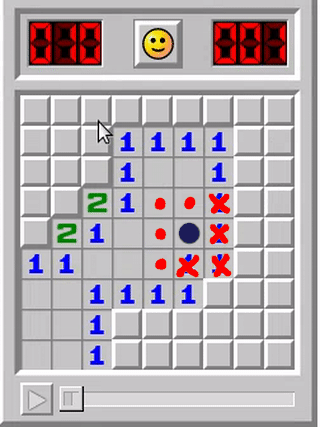

Então, cada célula vazia (sem bomba e sem vizinhos com bombas) representadas pelos **pontos vermelhos**, vão repetir o processo com seus respectivos vizinhos, realizando a **chamada recursiva**.

E, as células que apresentarem vizinhos com bombas, representadas pelos **x em vermelho**, estão em uma **condição de parada** e não vão realizar chamadas de função.

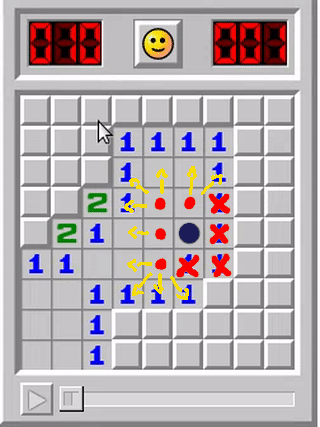


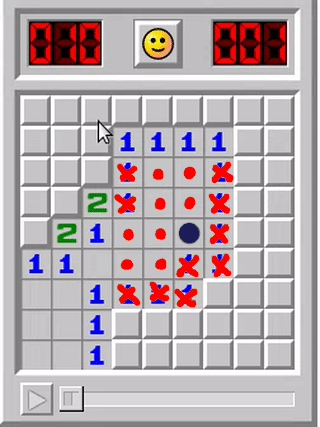


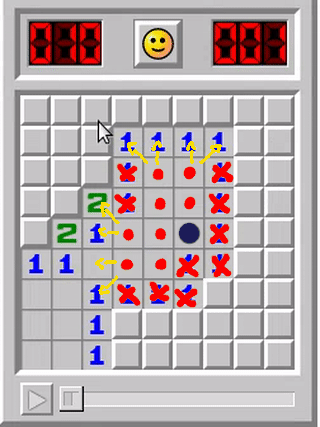

Assim, o processo segue de forma **recursiva** até que não tenha mais *'saídas'*, ou seja, não se chegou a mais células vazias e chegamos ao final da recursão.



---



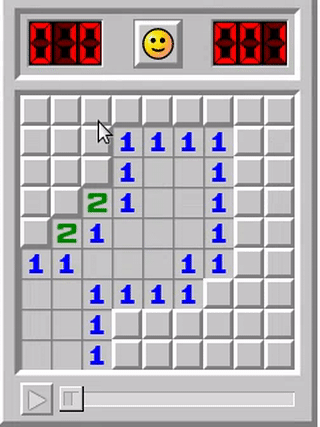



---



## Aplicação em código

### Código completo da recursão